In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

import torch

In [134]:
X, y = make_regression(n_samples=100000, n_features=100, noise=10)
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2)
X = torch.Tensor(X)
y = torch.Tensor(y.reshape(-1, 1))
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test.reshape(-1, 1))

# This step is necessary as the Pytorch layers expect Tensors instead of numpy arrays.

In [135]:
class LinearRegression(torch.nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.linear = torch.nn.Linear(in_features, 1)

    def forward(self, x):
        return self.linear(x)
        
model = LinearRegression(X.shape[1]) # Initialize the model

loss_fn = torch.nn.MSELoss() # Define the loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Define the optimizer

In [136]:
prev_loss = 0
for epoch in range(10000):
    model.train() # Set the model to training mode
    y_pred = model(X) # Evaluate the model on the training data
    loss = loss_fn(y_pred, y) # Calculate the loss

    # Early stopping 
    if (abs(loss.item() - prev_loss)) < 1e-6:
        print(f"Converged after {epoch} epochs")
        break
    # print("Model params: ", model.state_dict())
    optimizer.zero_grad() # Reset the gradients for optimizer
    loss.backward() # Calculate the gradients for loss_fn wrt model parameters
    optimizer.step() # Update the model parameters

    model.eval() # Set the model to evaluation mode
    y_pred_test = model(X_test) # Evaluate the model on the test data
    loss_test = loss_fn(y_pred_test, y_test) # Calculate the loss


    
    prev_loss = loss.item()
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, loss: {loss.item()}, loss_test: {loss_test.item()}")

Epoch: 0, loss: 36935.0390625, loss_test: 36301.13671875
Epoch: 100, loss: 777.172119140625, loss_test: 764.6280517578125
Epoch: 200, loss: 112.02754974365234, loss_test: 110.82955932617188
Epoch: 300, loss: 99.56891632080078, loss_test: 98.88114166259766
Epoch: 400, loss: 99.33170318603516, loss_test: 98.6982650756836
Converged after 482 epochs


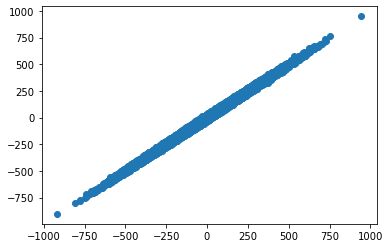

In [137]:
plt.scatter(y, model(X).detach().numpy())
plt.show()

# We need to detach the tensor from the computation graph to avoid keeping it in memory for gradient calculations.
